# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Introducción a la API funcional de Keras-3</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Prepara datos de MNIST](#Prepara-datos-de-MNIST)
* [Separa lotes de datos y mezclar el conjunto de datos](#Separa-lotes-de-datos-y-mezcla-el-conjunto-de-datos)
* [API Fucional de Keras. Sub-clases](#API-Funcional-de-Keras.-Sub-clases)
* [Optimizador y función de pérdida](#Optimizador-y-función-de-pérdida)
* [Métricas para medir pérdida y precisión](#Métricas-para-medir-pérdida-y-precisión)
* [Función de entrenamiento: diferenciación automática con tf.GradientTape](#Función-de-entrenamiento:-diferenciación-automática-con-tf.GradientTape)
* [Compila el modelo](#Compila-el-modelo)
* [Summary y Plot Model](#Summary-y-Plot-Model) 
* [Entrenamiento y evaluación del modelo](#Entrenamiento-y-evaluación-del-modelo) 

## <span style="color:blue">Introducción</span>

Este es un notebook de Google Colaboratory. Los programas de Python se executan directamente en tu navegador,  una gran manera de aprender y utilizar TensorFlow. Para poder seguir este tutorial, ejecuta este notebook en Google Colab. Basado en [Tensorflow- quick start expertos](https://www.tensorflow.org/tutorials/quickstart/advanced)


In [16]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
print('Version de Tensorflow = ', tf.__version__)

# Objetos de la API de Keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D, Dropout
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model

# datos mnist
from tensorflow.keras.datasets import mnist


Version de Tensorflow =  2.4.1


## <span style="color:blue">Prepara datos de MNIST</span> 

In [2]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Agrega una dimensión para manejo de canales de imágenes en tensorflow
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [3]:
x_test.shape

(10000, 28, 28, 1)

## <span style="color:blue">API Funcional de Keras. Sub-clases</span>

In [ ]:
VAmos a derivar nuestro model de la clase Model de la API funcional de Keras.

In [17]:
class MyModel(Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.conv1 = Conv2D(32, 3, strides=2, padding="same")
        self.nomalization1 = BatchNormalization()
        self.activation1 = Activation("relu")
        self.maxpooling1 = MaxPooling2D(3, strides=2, padding="same")
        self.dropout1 = Dropout(0.4)
        self.conv2 = Conv2D(64, 3, strides=2, padding="same")
        self.nomalization2 = BatchNormalization()
        self.activation2 = Activation("relu")
        self.global_average = GlobalAveragePooling2D()
        #self.flatten= Flatten()
        #self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self,x):
        x = self.conv1(x)
        x = self.nomalization1(x)
        x = self.activation1(x)
        x = self.maxpooling1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.nomalization2(x)
        x = self.activation2(x)
        x = self.global_average(x)
        #x = self.flatten(x)
        #x = self.d1(x)
        return self.d2(x)

# crea una instancia del modelo
model = MyModel()

## <span style="color:blue">Compile</span>

Escoge metricas para medir la perdida y exactitud del modelo. Estas metricas acumulan los valores cada epoch y despues imprimen el resultado total.


In [18]:
model.compile(optimizer= "Adam",
             loss="SparseCategoricalCrossentropy",
             metrics=["accuracy"])

## <span style="color:blue">Entrena</span>

In [19]:

history = model.fit(x_train, y_train, 
                    validation_data = (x_test,y_test),
                    batch_size = 64,
                    shuffle=True,
                    verbose=2,
                    epochs=10)

Epoch 1/10
938/938 - 53s - loss: 1.0861 - accuracy: 0.6945 - val_loss: 0.5977 - val_accuracy: 0.8502
Epoch 2/10
938/938 - 49s - loss: 0.5247 - accuracy: 0.8635 - val_loss: 0.3469 - val_accuracy: 0.9162
Epoch 3/10
938/938 - 54s - loss: 0.3531 - accuracy: 0.9094 - val_loss: 0.2050 - val_accuracy: 0.9501
Epoch 4/10
938/938 - 47s - loss: 0.2801 - accuracy: 0.9250 - val_loss: 0.1806 - val_accuracy: 0.9502
Epoch 5/10
938/938 - 46s - loss: 0.2382 - accuracy: 0.9359 - val_loss: 0.1448 - val_accuracy: 0.9608
Epoch 6/10
938/938 - 47s - loss: 0.2146 - accuracy: 0.9412 - val_loss: 0.1377 - val_accuracy: 0.9614
Epoch 7/10
938/938 - 49s - loss: 0.1941 - accuracy: 0.9455 - val_loss: 0.1700 - val_accuracy: 0.9525
Epoch 8/10
938/938 - 44s - loss: 0.1814 - accuracy: 0.9482 - val_loss: 0.1270 - val_accuracy: 0.9621
Epoch 9/10
938/938 - 52s - loss: 0.1679 - accuracy: 0.9512 - val_loss: 0.1604 - val_accuracy: 0.9532
Epoch 10/10
938/938 - 44s - loss: 0.1613 - accuracy: 0.9535 - val_loss: 0.0941 - val_accura

# Gráficas

## <span style="color:blue">Primeros gráficos</span> 

### Extrae datos

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.086112,0.694450,0.597735,0.8502,0
1,0.524672,0.863467,0.346940,0.9162,1
2,0.353114,0.909367,0.205046,0.9501,2
3,0.280106,0.925033,0.180625,0.9502,3
4,0.238196,0.935900,0.144808,0.9608,4
5,0.214641,0.941233,0.137737,0.9614,5
6,0.194147,0.945467,0.170007,0.9525,6
7,0.181433,0.948250,0.127024,0.9621,7
8,0.167895,0.951183,0.160419,0.9532,8
9,0.161275,0.953483,0.094053,0.9725,9


### Pérdida

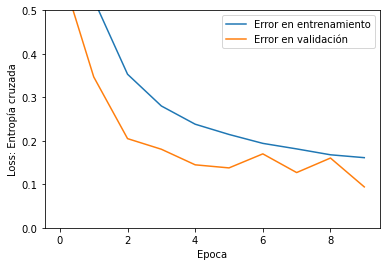

In [21]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.plot(hist['epoch'], hist['val_loss'],
           label='Error en validación')
plt.ylim([0,0.5])
plt.legend()
plt.show()

### Exactitud

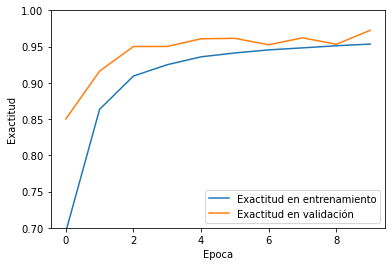

In [22]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud en entrenamiento')
plt.plot(hist['epoch'], hist['val_accuracy'],
           label='Exactitud en validación')
plt.ylim([0.7,1])
plt.legend()
plt.show()

## <span style="color:blue">Summary y plot</span>

In [23]:
model.summary()

Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            multiple                  320       
_________________________________________________________________
batch_normalization_4 (Batch multiple                  128       
_________________________________________________________________
activation_3 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_5 (Batch multiple                  2

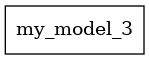

In [24]:
plot_model(model, to_file='../Imagenes/mnist_conv2d.png', 
          show_shapes=True, show_dtype=False)